In [164]:
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np
import os

In [166]:
os.getcwd()

'/home/jovyan/data-store/cross-sensor-cal'

In [167]:
envi_image= 'export/NEON_D13_NIWO_DP1_20200807_163444_reflectance__corrected_0'

#anc_data = {'path_length': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 0],
# 'sensor_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 1],
# 'sensor_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 2],
# 'solar_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 3],
# 'solar_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 4],
# 'phase': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 5],
# 'slope': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 6],
# 'aspect': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 7],
# 'cosine_i': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 8],
# 'utc_time': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 9]}

envi = ht.HyTools()
envi.read_file(envi_image,'envi')


In [194]:
mask_image= 'export/NEON_D13_NIWO_DP1_20200807_170802_reflectance__corrected_0_mask'

#anc_data = {'path_length': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 0],
# 'sensor_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 1],
# 'sensor_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 2],
# 'solar_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 3],
# 'solar_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 4],
# 'phase': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 5],
# 'slope': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 6],
# 'aspect': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 7],
# 'cosine_i': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 8],
# 'utc_time': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 9]}

my_mask = ht.HyTools()
my_mask.read_file(mask_image,'envi', anc = "data/iplant/home/shared/earthlab/macrosystems/Topo_Corr/output/NEON_D13_NIWO_DP1_20200807_170802_reflectance_ancillary")






In [206]:
line = envi.get_line(100, corrections = [])
band = envi.get_band(40)
wave = envi.get_wave(660)
pixel = envi.get_pixels([500],[500])
anc = envi.get_anc('sensor_zn',radians =False)

TypeError: 'NoneType' object is not subscriptable

In [209]:
print(envi.anc_path)

None


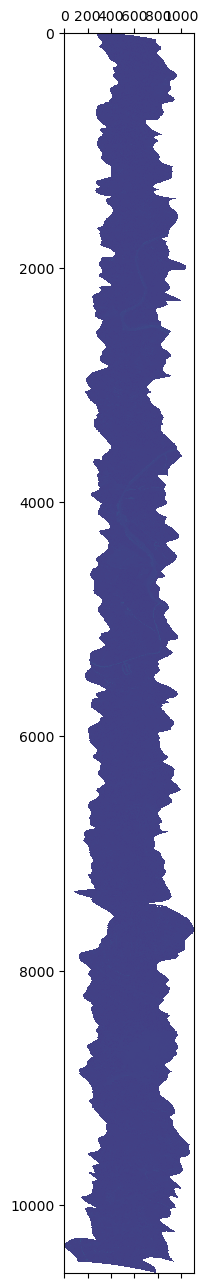

In [177]:
band = np.copy(band)
band[~envi.mask['no_data']] = np.nan
plt.matshow(band)

In [178]:
topo_coeffs = 'export/NEON_D13_NIWO_DP1_20200807_163444_reflectance_topo_coeffs__corrected_0.json'
envi.load_coeffs(topo_coeffs,'topo')

brdf_coeffs = 'export/NEON_D13_NIWO_DP1_20200807_163444_reflectance_brdf_coeffs__corrected_0.json'
envi.load_coeffs(brdf_coeffs,'brdf')

In [134]:
#print(envi.brdf)
#print(envi.topo)

In [179]:
envi.get_wave(660,corrections= ['topo'])

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [200]:
def show_rgb(hy_obj,r=660,g=550,b=440, correct= []):

    rgb=  np.stack([hy_obj.get_wave(r,corrections= correct),
                    hy_obj.get_wave(g,corrections= correct),
                    hy_obj.get_wave(b,corrections= correct)])
    rgb = np.moveaxis(rgb,0,-1).astype(float)
    rgb[rgb ==hy_obj.no_data] = np.nan

    bottom = np.nanpercentile(rgb,5,axis = (0,1))
    top = np.nanpercentile(rgb,95,axis = (0,1))
    rgb = np.clip(rgb,bottom,top)

    rgb = (rgb-np.nanmin(rgb,axis=(0,1)))/(np.nanmax(rgb,axis= (0,1))-np.nanmin(rgb,axis= (0,1)))

    height = int(hy_obj.lines/hy_obj.columns)

    fig  = plt.figure(figsize = (7,7) )
    plt.imshow(rgb)
    plt.show()
    plt.close()
    


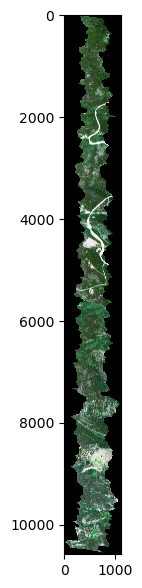

In [201]:
show_rgb(envi, correct= [], mask = my_mask)

In [202]:
show_rgb(envi, correct = ['topo'])

TypeError: 'NoneType' object is not subscriptable

In [190]:
show_rgb(envi, correct = ['brdf'])

TypeError: 'NoneType' object is not subscriptable

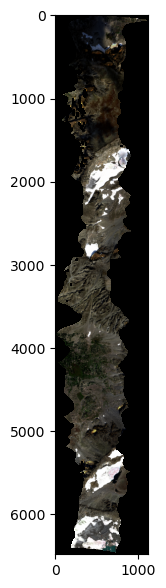

In [183]:
show_rgb(envi, correct = ['topo','brdf'])

In [187]:
envi.get_wave(1450, corrections= ['topo', 'brdf'])

TypeError: 'NoneType' object is not subscriptable

In [186]:
difference = envi.get_wave(1450) - envi.get_wave(1450,corrections= ['topo',
                                                                  'brdf'])
plt.matshow(difference)

TypeError: 'NoneType' object is not subscriptable

In [160]:
outwaves = [x for x in range(450,2500,25)]
neon.resampler = {'type': 'cubic','out_waves' :outwaves}

(0.0, 0.6)

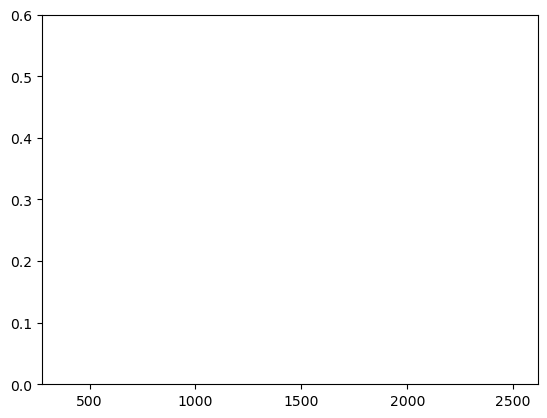

In [161]:
original = neon.get_pixels([100],[100])
resample =neon.get_pixels([100],[100], resample = True)

plt.plot(neon.wavelengths,original[0])
plt.plot(outwaves,resample[0])
plt.ylim(0,.6)

In [142]:
neon_image= 'NEON_D13_NIWO_DP1_20170904_181819_reflectance.h5'

neon = ht.HyTools()
neon.read_file(neon_image,'neon')

In [143]:
neon.map_info

['UTM',
 '  1.000',
 '  1.000',
 '  444373.000',
 '  4436865.000',
 '  1.0000000000e+000',
 '  1.0000000000e+000',
 '  13',
 '  North',
 '  WGS-84',
 '  units=Meters',
 ' 0']

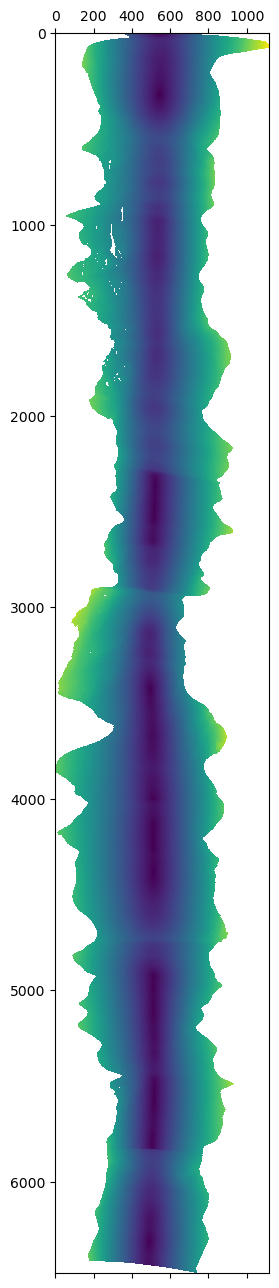

In [144]:
data = np.copy(neon.get_anc('sensor_zn', radians = False))

data[~neon.mask['no_data']] = np.nan

plt.matshow(data)

ValueError: x and y must have same first dimension, but have shapes (82,) and (426,)

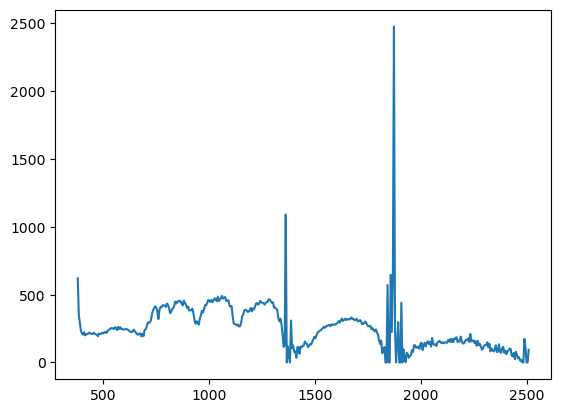

In [147]:
original = neon.get_pixels([500],[500])
resample =neon.get_pixels([500],[500], resample = True)

plt.plot(neon.wavelengths,original[0])
plt.plot(outwaves,resample[0])
plt.ylim(0,.6)

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def universal_diagno_plot(hy_obj,config_dict):
    ''' Generate a diagnostic plot of BRDF correction results.
    '''
    #Flip sign of zenith angle at minimum
    sensor_zn = hy_obj.get_anc('sensor_zn',radians =False)
    sensor_zn[~hy_obj.mask['no_data']] = np.nan
    for i,line in enumerate(sensor_zn):
        line[:np.nanargmin(line)] *= -1
        sensor_zn[i] = line
    sensor_zn = (sensor_zn[hy_obj.mask['calc_brdf']]//2)*2

    diagno_df = pd.DataFrame()
    diagno_df['sensor_zn'] =sensor_zn

    bands = [hy_obj.wave_to_band(wave) for wave in config_dict['brdf']['diagnostic_waves']]
    for band_num in bands:
        band = hy_obj.get_band(band_num,mask='calc_brdf')
        diagno_df['uncorr_%s' % band_num] =  band

        band = hy_obj.get_band(band_num,
                               corrections = hy_obj.corrections + ['brdf'],
                               mask='calc_brdf')

        diagno_df['corr_%s' % band_num] =  band
        fvol, fgeo, fiso  = hy_obj.brdf['coeffs'][band_num]

        brdf = fvol*hy_obj.ancillary['k_vol']
        brdf += fgeo*hy_obj.ancillary['k_geom']
        brdf+=fiso
        brdf = brdf[hy_obj.mask['calc_brdf']]
        diagno_df['brdf_%s' % band_num] =  brdf

    # Average every 2 degrees of zenith angle
    diagno_df=  diagno_df.groupby(by= 'sensor_zn').mean()

    fig = plt.figure(figsize= (8,6))
    fig.suptitle(hy_obj.base_name)
    for a,band_num in enumerate(bands,start=1):
        ax = fig.add_subplot(2,2,a)
        ax.plot(diagno_df.index,diagno_df['brdf_%s' % band_num],c='k',ls ='--')
        ax.scatter(diagno_df.index,diagno_df['uncorr_%s' % band_num],marker ='o',fc='w',ec='k')
        ax.scatter(diagno_df.index,diagno_df['corr_%s' % band_num],marker ='o',fc='k',ec='k')
        ax.text(.85,.9, "%s nm" % int(hy_obj.wavelengths[band_num]), transform=ax.transAxes,
                ha = 'center', fontsize = 12)
        if a > 2:
            ax.set_xlabel('View zenith angle')
        if a in [1,3]:
            ax.set_ylabel('Reflectance')

    #Create legend
    custom_points = []
    custom_points.append(Line2D([0],[0], marker = 'o',label='Uncorrected',
                          markerfacecolor='w', markersize=10,lw=0,markeredgecolor='k'))
    custom_points.append(Line2D([0],[0], marker = 'o',label='Corrected',
                          markerfacecolor='k', markersize=10,lw=0,markeredgecolor='k'))
    custom_points.append(Line2D([0],[1],label='Modeled BRDF',c='k', ls ='--'))
    ax.legend(handles=custom_points, loc='center',frameon=False,
              bbox_to_anchor=(-.15, -.3), ncol =3,columnspacing = 1.5,labelspacing=.25)

    plt.savefig("%s%s_brdf_plot.png" % (config_dict['export']['output_dir'],hy_obj.base_name),
                bbox_inches = 'tight')
    plt.close()

In [205]:
universal_diagno_plot(envi,brdf_coeffs)

TypeError: 'NoneType' object is not subscriptable